In [23]:
from scipy.integrate import quadrature
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import clear_output
from scipy.stats import linregress

# Analiza klasycznej kwadratury prostokątów

Niech $I(f) := \int_{a}^{b} f(x) dx$, $f\in C^1([a,b])$ oraz niech $Q_n^R(f):=h \sum_{j=0}^{n-1}f(t_j)$ oznacza kwadraturę prostokątów rzędu $n$ dla funkcji $f$ ($h=\frac{b-a}{n}$, $n\in \mathbb{N}$, $t_j=a+jh, j=0,1,\ldots,n$).

Rozważmy funkcję $f(x) = x ^ 2$ z $a=0, b=2$. 

W celu uzyskania wartości $I(f)$ skorzystamy z metody `quadrature` z modułu `scipy.integrate`.

## Eksperyment 1

Celem pierwszego eksperymentu będzie analiza błędu $E_2^n(f) = |I(f) - fl(Q_n^R(f))|$ w zależności od wartości $n$.

In [24]:
f = lambda x: x ** 2
a = 0.0
b = 2.0
information, error = quadrature(f, a, b)
print(f'Value of given definite integral is: {information}')

Value of given definite integral is: 2.6666666666666665


In [25]:
def naive_rectangle_rule(f, a, b, n):
    """
    Naive approach
    """
    h = (b - a) / n
    w = 0
    for i in range(n):
        if i % 1000000 == 0:
            clear_output(wait=True)
            print(i)
        w += f(a + i * h)
    area = w * h
    return area

In [26]:
def gen_rectangle_rule(f, a, b, n):
    """
    Generator approach
    """
    h = (b - a) / n
    i = 0
    while True:
        yield f(a + i * h)
        i += 1

In [27]:
def vect_rectangle_rule(f, a, b, n):
    """
    Vectorization approach
    """
    h = (b - a) / n
    x = np.linspace(a, b - h, n)
    area = np.sum(f(x)) * h
    return area

In [28]:
def vect_div_rectangle_rule(f, a, b, n, division):
    """
    Vectorization approach with division of x array
    in order to reduce memory consumption
    """
    h = (b - a) / n
    area = 0
    for i in range(division):
        x = np.linspace(a + ((b - h - a) / division) * i, a + ((b - h - a) / division) * (i + 1), n // division)
        area += np.sum(f(x))
    return area * h

In [67]:
n_array = [(k, 10 ** k) for k in range(1, 12)]

In [68]:
results = []

In [69]:
for k, n in n_array:
    if k < 10:
        approx = vect_rectangle_rule(f, a, b, n)
    else:
        approx = vect_div_rectangle_rule(f, a, b, n, k ** 4)
    print(f'log10(n): {k},\terror: {abs(information - approx)},\tapprox. value of integral: {approx}')
    results.append((n, abs(information - approx)))

log10(n): 1,	error: 0.3866666666666658,	approx. value of integral: 2.2800000000000007
log10(n): 2,	error: 0.03986666666666627,	approx. value of integral: 2.6268000000000002
log10(n): 3,	error: 0.003998666666666484,	approx. value of integral: 2.662668
log10(n): 4,	error: 0.0003999866666664076,	approx. value of integral: 2.66626668
log10(n): 5,	error: 3.9999866666029504e-05,	approx. value of integral: 2.6666266668000005
log10(n): 6,	error: 3.999998666959215e-06,	approx. value of integral: 2.6666626666679996
log10(n): 7,	error: 3.9999998957540583e-07,	approx. value of integral: 2.666666266666677
log10(n): 8,	error: 3.999999620418748e-08,	approx. value of integral: 2.6666666266666703
log10(n): 9,	error: 3.999988340552818e-09,	approx. value of integral: 2.666666662666678
log10(n): 10,	error: 5.333187225176061e-10,	approx. value of integral: 2.666666666133348
log10(n): 11,	error: 2.1621333656796082e-07,	approx. value of integral: 2.66666645045333


Symulacje dla większych $n$ są utrudnione z uwagi na duży czas wykonywania funkcji do obliczania kwadratury (również po zmianie dtype przy wektoryzacji)

In [70]:
xs = [el[0] for el in results]
ys = [el[1] for el in results]

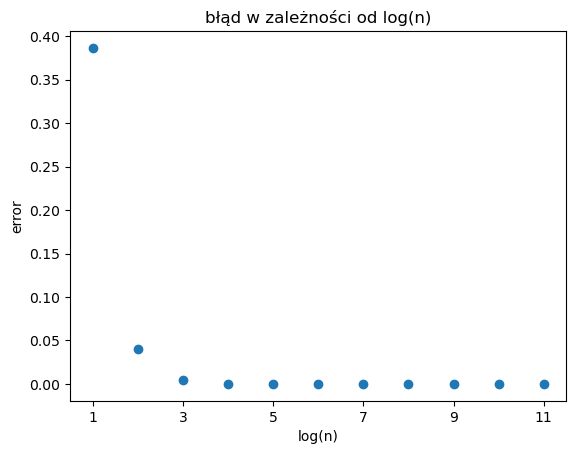

In [71]:
plt.scatter(np.log10(xs), ys)
plt.xlabel('log(n)')
plt.xticks(np.log10(xs)[::2])
plt.ylabel('error')
plt.title('błąd w zależności od log(n)')
plt.show()

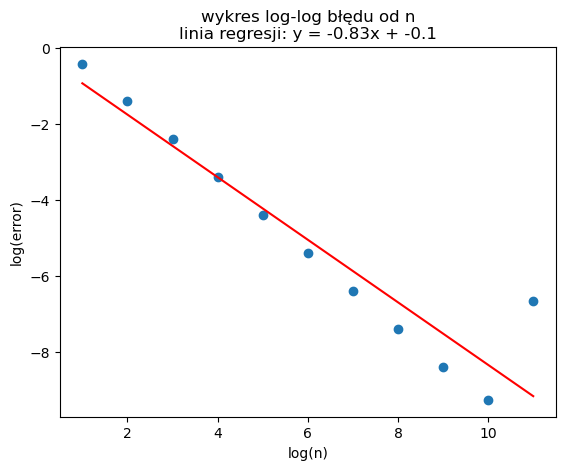

In [74]:
plt.scatter(np.log10(xs), np.log10(ys))
slope, intercept, r, p, std_err = linregress(np.log10(xs), np.log10(ys))
def lin_reg(x):
    return slope * x + intercept

reg = list(map(lin_reg, np.log10(xs)))
plt.plot(np.log10(xs), reg, color='red')
plt.title(f'wykres log-log błędu od n\nlinia regresji: y = {round(slope, 2)}x + {round(intercept, 2)}')
plt.xlabel('log(n)')
plt.ylabel('log(error)')
plt.show()

In [75]:
# zapisywanie wyników, aby je porównać do zmodyfikowanej kwadratury prostokątów
saved_results = results

**Wnioski**

- dla zadanego przykładu możemy zaobserwować wzrost błędu przy $n = 10 ^ {11}$, co pokazuje w praktyce nasze rozważania teoretyczne

- współczynnik kierunkowy linii regresji jest bliski -1

## Eksperyment 2

Celem drugiego eksperymentu będzie analiza $n\cdot E_2^n(f) = n|I(f) - fl(Q_n^R(f))|$

In [76]:
results = []

In [77]:
for k, n in n_array:
    if k < 10:
        approx = vect_rectangle_rule(f, a, b, n)
    else:
        approx = vect_div_rectangle_rule(f, a, b, n, k ** 4)
    print(f'log10(n): {k},\terror: {n * abs(information - approx)},\tapprox. value of integral: {approx}')
    results.append((n, n * abs(information - approx)))

log10(n): 1,	error: 3.8666666666666583,	approx. value of integral: 2.2800000000000007
log10(n): 2,	error: 3.9866666666666273,	approx. value of integral: 2.6268000000000002
log10(n): 3,	error: 3.998666666666484,	approx. value of integral: 2.662668
log10(n): 4,	error: 3.999866666664076,	approx. value of integral: 2.66626668
log10(n): 5,	error: 3.9999866666029504,	approx. value of integral: 2.6666266668000005
log10(n): 6,	error: 3.9999986669592147,	approx. value of integral: 2.6666626666679996
log10(n): 7,	error: 3.9999998957540583,	approx. value of integral: 2.666666266666677
log10(n): 8,	error: 3.9999996204187482,	approx. value of integral: 2.6666666266666703
log10(n): 9,	error: 3.999988340552818,	approx. value of integral: 2.666666662666678
log10(n): 10,	error: 5.3331872251760615,	approx. value of integral: 2.666666666133348
log10(n): 11,	error: 21621.333656796083,	approx. value of integral: 2.66666645045333


In [78]:
xs = [el[0] for el in results]
ys = [el[1] for el in results]

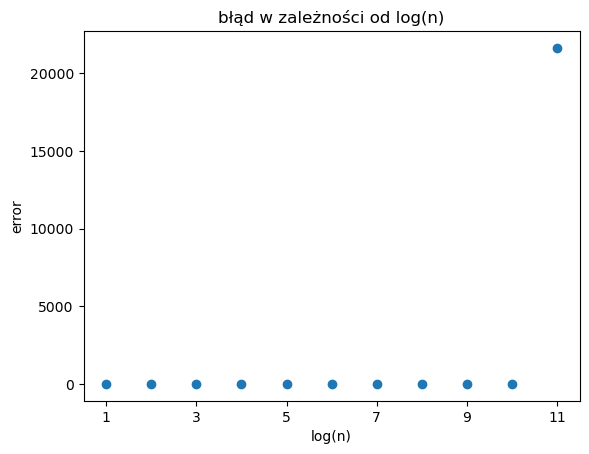

In [79]:
plt.scatter(np.log10(xs), ys)
plt.xlabel('log(n)')
plt.xticks(np.log10(xs)[::2])
plt.ylabel('error')
plt.title('błąd w zależności od log(n)')
plt.show()

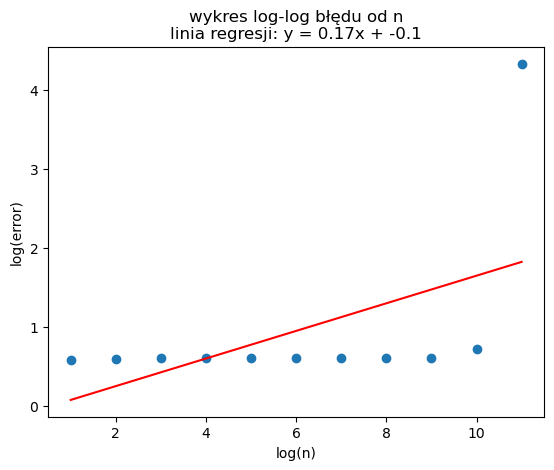

In [80]:
plt.scatter(np.log10(xs), np.log10(ys))
slope, intercept, r, p, std_err = linregress(np.log10(xs), np.log10(ys))
def lin_reg(x):
    return slope * x + intercept

reg = list(map(lin_reg, np.log10(xs)))
plt.plot(np.log10(xs), reg, color='red')
plt.title(f'wykres log-log błędu od n\nlinia regresji: y = {round(slope, 2)}x + {round(intercept, 2)}')
plt.xlabel('log(n)')
plt.ylabel('log(error)')
plt.show()

**Wniosek**

Na początku (do $n = 10 ^ 9$) obserwujemy stabilizację błędu, a następnie błąd zaczyna bardzo szybko rosnąć

## Eksperyment 3

Celem trzeciego eksperymentu będzie analiza $n\cdot F_2^n$, gdzie $F_2^n = I(f) - fl(Q_n^R(f))$

In [81]:
results = []

In [82]:
for k, n in n_array:
    if k < 10:
        approx = vect_rectangle_rule(f, a, b, n)
    else:
        approx = vect_div_rectangle_rule(f, a, b, n, k ** 4)
    print(f'log10(n): {k},\terror: {n * (information - approx)},\tapprox. value of integral: {approx}')
    results.append((n, n * (information - approx)))

log10(n): 1,	error: 3.8666666666666583,	approx. value of integral: 2.2800000000000007
log10(n): 2,	error: 3.9866666666666273,	approx. value of integral: 2.6268000000000002
log10(n): 3,	error: 3.998666666666484,	approx. value of integral: 2.662668
log10(n): 4,	error: 3.999866666664076,	approx. value of integral: 2.66626668
log10(n): 5,	error: 3.9999866666029504,	approx. value of integral: 2.6666266668000005
log10(n): 6,	error: 3.9999986669592147,	approx. value of integral: 2.6666626666679996
log10(n): 7,	error: 3.9999998957540583,	approx. value of integral: 2.666666266666677
log10(n): 8,	error: 3.9999996204187482,	approx. value of integral: 2.6666666266666703
log10(n): 9,	error: 3.999988340552818,	approx. value of integral: 2.666666662666678
log10(n): 10,	error: 5.3331872251760615,	approx. value of integral: 2.666666666133348
log10(n): 11,	error: 21621.333656796083,	approx. value of integral: 2.66666645045333


In [83]:
xs = [el[0] for el in results]
ys = [el[1] for el in results]

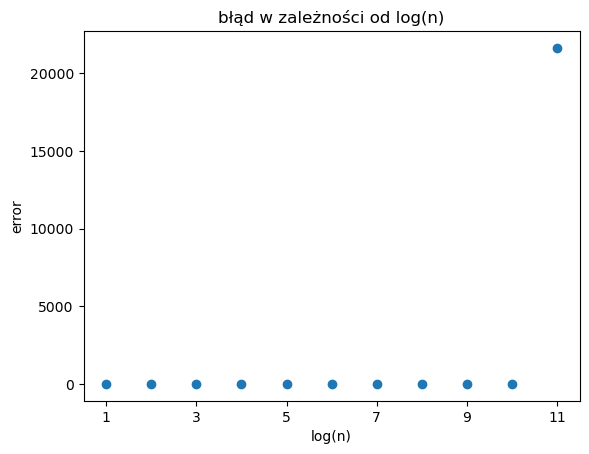

In [84]:
plt.scatter(np.log10(xs), ys)
plt.xlabel('log(n)')
plt.xticks(np.log10(xs)[::2])
plt.ylabel('error')
plt.title('błąd w zależności od log(n)')
plt.show()

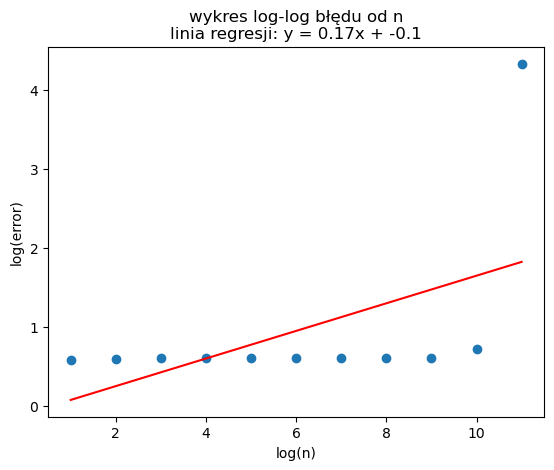

In [85]:
plt.scatter(np.log10(xs), np.log10(ys))
slope, intercept, r, p, std_err = linregress(np.log10(xs), np.log10(ys))
def lin_reg(x):
    return slope * x + intercept

reg = list(map(lin_reg, np.log10(xs)))
plt.plot(np.log10(xs), reg, color='red')
plt.title(f'wykres log-log błędu od n\nlinia regresji: y = {round(slope, 2)}x + {round(intercept, 2)}')
plt.xlabel('log(n)')
plt.ylabel('log(error)')
plt.show()

**Wnioski:**

- ponieważ $F_2^n(f)$ niezależnie od wartości $n$ wychodzi dodatni, to wyniki są identyczne, jak przy eksperymencie nr 2

# Analiza zmodyfikowanej kwadratury prostokątów

Niech $Q_n^{R^*}(f):=Q_n^R(f) + \frac{C_*^R(f)}{n}$ oznacza zmodyfikowaną kwadraturę prostokątów rzędu $n$ dla funkcji $f$, gdzie $C_*^R(f) = \frac{b-a}{2}(f(b)-f(a))$. Reszta oznaczeń pozostaje bez zmian w stosunku do klasycznej kwadratury prostokątów.

Użycie takowej poprawki nie zmienia kosztu, a zmniejsza błąd.

In [86]:
def vect_modif_rectangle_rule(f, a, b, n):
    """
    Vectorization approach
    Rectangle rule is modified to reduce an error
    """
    h = (b - a) / n
    x = np.linspace(a, b - h, n)
    area = np.sum(f(x)) * h
    c_star = (b - a) / 2 * (f(b) - f(a))
    
    return area + c_star / n

In [87]:
def vect_div_modif_rectangle_rule(f, a, b, n, division):
    """
    Vectorization approach with division of x array
    in order to reduce memory consumption
    Rectangle rule is modified to reduce an error
    """
    h = (b - a) / n
    area = 0
    for i in range(division):
        x = np.linspace(a + ((b - h - a) / division) * i, a + ((b - h - a) / division) * (i + 1), n // division)
        area += np.sum(f(x))
        
    c_star = (b - a) / 2 * (f(b) - f(a))
    return area * h + c_star / n

## Analiza błędu $E_2^n(f) = |I(f) - fl(Q_n^{R^*}(f))|$ w zależności od wartości $n$.

In [88]:
results = []

In [89]:
for k, n in n_array:
    if k < 10:
        approx = vect_modif_rectangle_rule(f, a, b, n)
    else:
        approx = vect_div_modif_rectangle_rule(f, a, b, n, k ** 4)
    print(f'log10(n): {k},\terror: {abs(information - approx)},\tapprox. value of integral: {approx}')
    results.append((n, abs(information - approx)))

log10(n): 1,	error: 0.013333333333334085,	approx. value of integral: 2.6800000000000006
log10(n): 2,	error: 0.00013333333333376274,	approx. value of integral: 2.6668000000000003
log10(n): 3,	error: 1.333333333519704e-06,	approx. value of integral: 2.666668
log10(n): 4,	error: 1.333333354835986e-08,	approx. value of integral: 2.66666668
log10(n): 5,	error: 1.3333378845459265e-10,	approx. value of integral: 2.6666666668000003
log10(n): 6,	error: 1.333155807969888e-12,	approx. value of integral: 2.6666666666679997
log10(n): 7,	error: 1.021405182655144e-14,	approx. value of integral: 2.6666666666666767
log10(n): 8,	error: 3.9968028886505635e-15,	approx. value of integral: 2.6666666666666705
log10(n): 9,	error: 1.1546319456101628e-14,	approx. value of integral: 2.666666666666678
log10(n): 10,	error: 1.3331868942145775e-10,	approx. value of integral: 2.666666666533348
log10(n): 11,	error: 2.161733365646512e-07,	approx. value of integral: 2.66666645049333


In [90]:
xs = [el[0] for el in results]
ys = [el[1] for el in results]

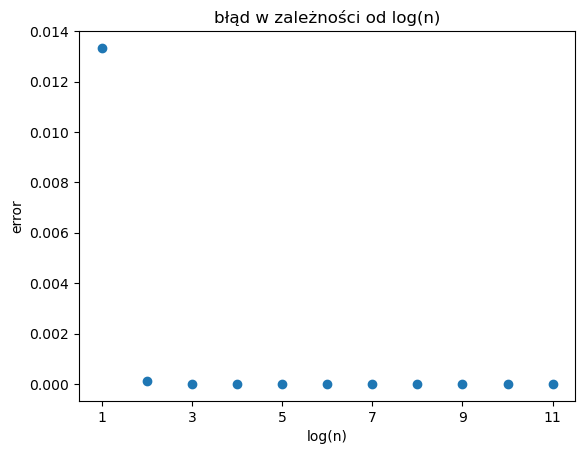

In [91]:
plt.scatter(np.log10(xs), ys)
plt.xlabel('log(n)')
plt.xticks(np.log10(xs)[::2])
plt.ylabel('error')
plt.title('błąd w zależności od log(n)')
plt.show()

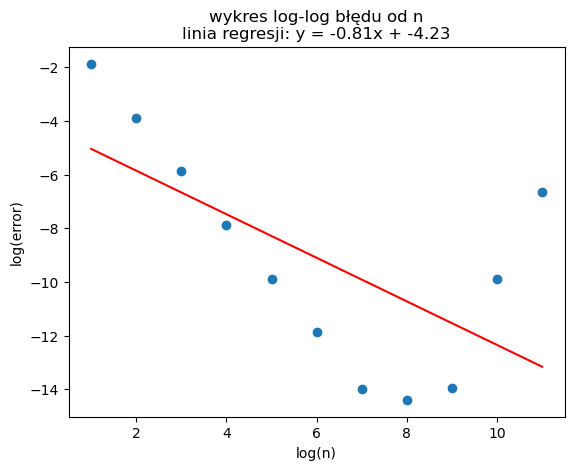

In [92]:
plt.scatter(np.log10(xs), np.log10(ys))
slope, intercept, r, p, std_err = linregress(np.log10(xs), np.log10(ys))
def lin_reg(x):
    return slope * x + intercept

reg = list(map(lin_reg, np.log10(xs)))
plt.plot(np.log10(xs), reg, color='red')
plt.title(f'wykres log-log błędu od n\nlinia regresji: y = {round(slope, 2)}x + {round(intercept, 2)}')
plt.xlabel('log(n)')
plt.ylabel('log(error)')
plt.show()

**Wniosek**

Dla zmodyfikowanej kwadratury prostokątów również obserwujemy potwierdzenie naszych teoretycznych rozważań (nawet już dla mniejszych $n$) - błąd zaczyna rosnąć już od $n = 10^9$.

## Analiza różnicy błędów kwadratur prostokątów (klasycznej i zmodyfikowanej)

Warta przeanalizowania jest również różnica błędów tych dwóch kwadratur. Pozwoli to nam się przekonać, czy faktycznie w praktyce wersja zmodyfikowana generuje mniejszy błąd i jak wygląda ta zależność.

In [103]:
ks = [x[0] for x in results]

In [104]:
errors1 = [x[1] for x in saved_results]
errors2 = [x[1] for x in results]

In [105]:
errors_diff = np.array(errors1) - np.array(errors2)

In [109]:
for k, error in zip(ks, errors_diff):
    print(f'log10(n): {int(np.log10(k))},\terror: {error}')

log10(n): 1,	error: 0.37333333333333174
log10(n): 2,	error: 0.03973333333333251
log10(n): 3,	error: 0.003997333333332964
log10(n): 4,	error: 0.0003999733333328592
log10(n): 5,	error: 3.999973333224105e-05
log10(n): 6,	error: 3.999997333803407e-06
log10(n): 7,	error: 3.99999979361354e-07
log10(n): 8,	error: 3.9999992207384594e-08
log10(n): 9,	error: 3.999976794233362e-09
log10(n): 10,	error: 4.000000330961484e-10
log10(n): 11,	error: 4.000000330961484e-11


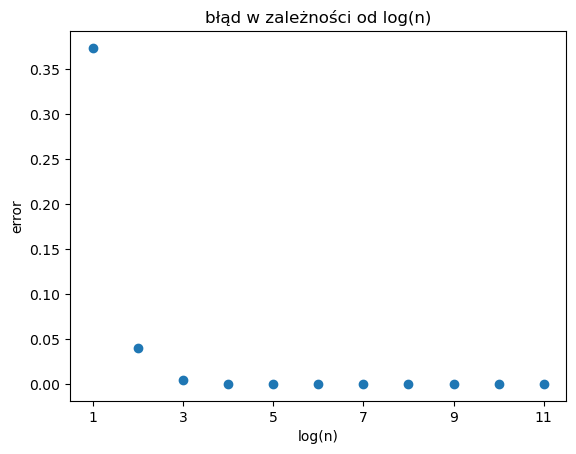

In [112]:
plt.scatter(np.log10(ks), errors_diff)
plt.xlabel('log(n)')
plt.xticks(np.log10(ks)[::2])
plt.ylabel('error')
plt.title('błąd w zależności od log(n)')
plt.show()

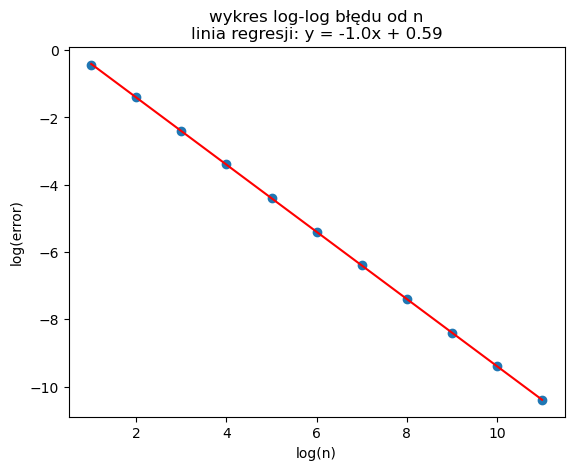

In [110]:
plt.scatter(np.log10(ks), np.log10(errors_diff))
slope, intercept, r, p, std_err = linregress(np.log10(ks), np.log10(errors_diff))
def lin_reg(x):
    return slope * x + intercept

reg = list(map(lin_reg, np.log10(ks)))
plt.plot(np.log10(ks), reg, color='red')
plt.title(f'wykres log-log błędu od n\nlinia regresji: y = {round(slope, 2)}x + {round(intercept, 2)}')
plt.xlabel('log(n)')
plt.ylabel('log(error)')
plt.show()

**Wnioski**

- dla każdego $n$ błąd wychodzi dodatni, co oznacza, że za każdym razem lepsza pod względem błędu okazuje się zmodyfikowana kwadratura

- zależność log(error) od log(n) wychodzi idealnie liniowa ze współczynnikiem kierunkowym -1